In [60]:
# importo librerias
import pandas as pd
import numpy as np

In [61]:
# cargo datos y reviso
data=pd.read_csv('cars_modelado.csv')
data.drop(columns='price',inplace=True)
data.head()


,drivewheel_rwd,wheelbase,cylindernumber,enginesize,fuelsystem_mpfi,boreratio,horsepower,fueltype_gas,aspiration_std,carbody_hatchback,drivewheel_fwd,enginelocation_front,enginetype_ohc,fuelsystem_1bbl,fuelsystem_2bbl,classification
0,1,-1.690772,0.0,0.227273,1,0.519071,0.347826,1,1,0,0,1,0,0,0,expensive
1,1,-1.690772,0.0,0.227273,1,0.519071,0.347826,1,1,0,0,1,0,0,0,expensive
2,1,-0.708596,2.0,0.727273,1,-2.404880,1.282609,1,1,1,0,1,0,0,0,expensive
3,0,0.173698,0.0,-0.250000,1,-0.517266,0.152174,1,1,0,1,1,1,0,0,expensive
4,0,0.107110,1.0,0.363636,1,-0.517266,0.434783,1,1,0,0,1,1,0,0,expensive


In [62]:
# porque usar un modelo de ML para calcular si un objeto es caro o barato en base a la media de precios?
'''def clasificador(price):
    if price<=data['price'].median():
        return 'cheap'
    else:
        return 'expensive'

data['classification'] = data.price.apply(clasificador)'''

"def clasificador(price):\n    if price<=data['price'].median():\n        return 'cheap'\n    else:\n        return 'expensive'\n\ndata['classification'] = data.price.apply(clasificador)"

In [63]:
# voy a intentar usar una regresion multilineal para predecir el precio de nuevos vehiculos
# primero hay que definir X e y
# voy a crear X usando hstack para crear los arrays
# itero por las columnas, las meto en una lista y las stackeo en un array X
x=[]
for i in data:
    if (i!='classification'):
        x.append(np.array(data[i]).reshape(-1,1))

X=np.hstack(x)
y=np.array(data.classification).reshape(-1,1)


In [64]:
# voy a usar polinomyalfeatures para intentar mejorar el modelo
'''from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only=True)
X=poly.fit_transform(X)'''

'from sklearn.preprocessing import PolynomialFeatures\npoly = PolynomialFeatures(degree=2,interaction_only=True)\nX=poly.fit_transform(X)'

In [65]:
X

array([[ 1.        , -1.6907718 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -1.6907718 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.70859588,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  1.72187336,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.72187336,  2.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.72187336,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [66]:
y

array([['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['expensive'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['cheap'],
       ['cheap'],
       ['cheap'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['expensive'],
       ['cheap'],


In [67]:
# seleccionar datos de training y de testing para poder verificar si el modelo funciona. Importo train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
autos_tree = DecisionTreeClassifier()
autos_tree.fit(x_train, y_train)
y_pred = autos_tree.predict(x_test)
y_test_pred = autos_tree.predict(x_test)

In [70]:
# con accuracy score
from sklearn.metrics import accuracy_score
print('score con datos de entrenamiento:',autos_tree.score(x_train,y_train))
print('score con datos de prueba',autos_tree.score(x_test,y_test))
print('accuracy score entrenamiento:',accuracy_score(y_test,y_test_pred))
print('accuracy score prueba:',accuracy_score(y_test,y_pred))
# score es lo mismo que accuracy score

score con datos de entrenamiento: 0.9751552795031055
score con datos de prueba 0.8292682926829268
accuracy score entrenamiento: 0.8292682926829268
accuracy score prueba: 0.8292682926829268


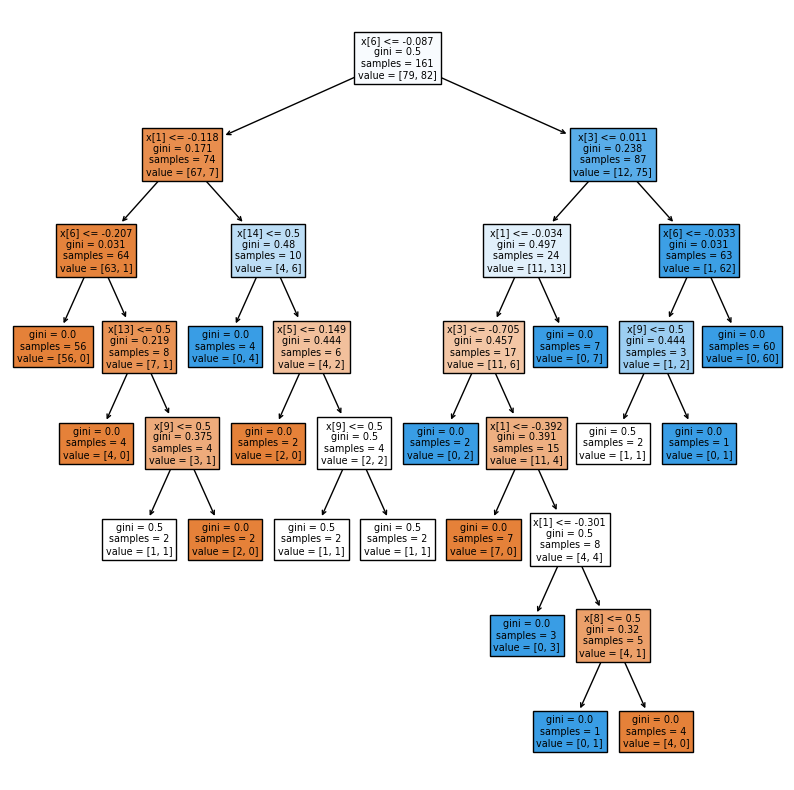

In [71]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(autos_tree, filled = True)
plt.show()

In [56]:
from sklearn.model_selection import GridSearchCV
autos_grid = DecisionTreeClassifier()

autos_params = {'max_depth':np.arange(start=1,stop=10),
                'criterion':['gini','entropy','log_loss'],
                'splitter':['best','random']}

autos_mod = GridSearchCV(autos_grid,param_grid=autos_params,cv=5)

autos_mod.fit(X,y)

y_pred=autos_mod.predict(X)

In [57]:
print('score con datos de entrenamiento:',autos_tree.score(X,y))
print('accuracy score entrenamiento:',accuracy_score(y,y_pred))

score con datos de entrenamiento: 0.9455445544554455
accuracy score entrenamiento: 0.9356435643564357


In [58]:
autos_mod.best_params_

{'criterion': 'log_loss', 'max_depth': 6, 'splitter': 'random'}

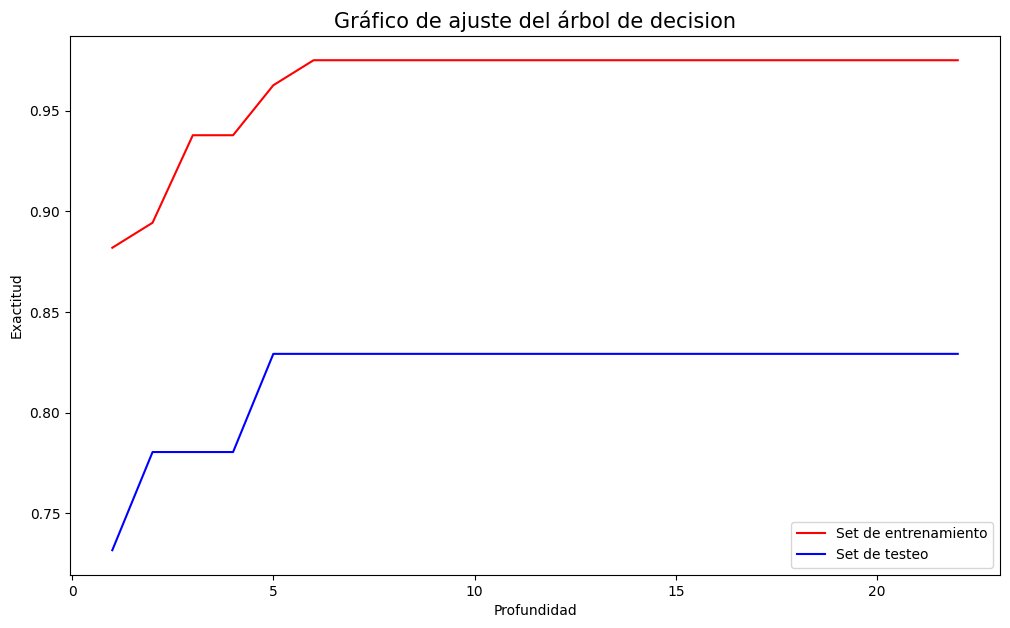

In [59]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 23))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(x_train, y_train)
    train_prec.append(clf_3.score(x_train, y_train))
    eval_prec.append(clf_3.score(x_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

In [7]:
# instancio un objeto LinearRegression importando la libreria --> le doy la data necesaria con fit
from sklearn.linear_model import LinearRegression

autos_reg = LinearRegression()

autos_reg.fit(x_train,y_train.ravel())

LinearRegression()

In [8]:
# vamos a revisar la pendiente y la ordenada al origen
print('la ordenada al origen del modelo es:',autos_reg.intercept_)
print('la pendiente de las curvas son:',autos_reg.coef_)

la ordenada al origen del modelo es: 9.167977528941265
la pendiente de las curvas son: [ 0.11388463  0.09254425 -0.05228526  0.19877275  0.17835795 -0.00303757
  0.20337491]


In [9]:
# creo curva de prediccion
y_pred = autos_reg.predict(x_train)
y_test_pred=autos_reg.predict(x_test)

In [10]:
# scores: el score es algo bajo, por lo que es necesario complejizar un poco el modelo --> utilizar one hot encoding y polynomialfeatures mejoro el modelo
# tambien creo que hay algun sesgo en el train_test_split dado que mis resultados varian mucho con el tamaño de la muestra y la muestra en si
from sklearn.metrics import mean_squared_error,r2_score
print('score con datos de entrenamiento:',autos_reg.score(x_train,y_train))
print('score con datos de prueba',autos_reg.score(x_test,y_test))
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
r2s=r2_score(y_test,y_test_pred)
print('r2 score',r2s)


score con datos de entrenamiento: 0.8469923595698097
score con datos de prueba 0.7579162490705509
Mean Squared Error: 0.07476970967379543
r2 score 0.7579162490705509


In [11]:
# voy a probar otros modelos ya que creo que el problema es que la regresion lineal es muy simple para este caso
# random forest regressor capaz? -> si bien los scores han mejorado, el modelo no estaria siendo util para casos nuevos...
from sklearn.ensemble import RandomForestRegressor

autos_random_forest = RandomForestRegressor(n_estimators=10,random_state=42)

autos_random_forest.fit(x_train,y_train.ravel())

y_pred = autos_random_forest.predict(x_train)
y_test_pred = autos_random_forest.predict(x_test)

print('score con datos de entrenamiento:',autos_random_forest.score(x_train,y_train))
print('score con datos de prueba',autos_random_forest.score(x_test,y_test))
mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", mse)
r2s=r2_score(y_test,y_test_pred)
print('r2 score',r2s)

score con datos de entrenamiento: 0.961408072605008
score con datos de prueba 0.8344928486541043
Mean Squared Error: 0.051118348949723544
r2 score 0.8344928486541043
